Testing

In [1]:
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm, lognorm, gamma

In [2]:
# # Test Graph

# testGraph = ox.graph.graph_from_point((38.539078, -121.752065), dist=250, network_type='bike')
# fig, ax = ox.plot.plot_graph(testGraph)

# # Save the graph for offline access
# ox.io.save_graphml(testGraph, "testGraph.graphml")

In [3]:
# # Bike Network Graph

# location = ox.geocoder.geocode("Primero Grove Apartments")
# bikeGraph = ox.graph.graph_from_point(location, dist=500, network_type='bike')
# fig, ax = ox.plot.plot_graph(bikeGraph)

# # Save the graph for offline access
# ox.io.save_graphml(bikeGraph, "bikeGraph.graphml")

In [4]:
testGraph = ox.io.load_graphml("testGraph.graphml")
testGraph = ox.routing.add_edge_speeds(testGraph)
testGraph = ox.routing.add_edge_travel_times(testGraph)

In [5]:
nodes, edges = ox.graph_to_gdfs(testGraph)

In [6]:
nodes

y           x  street_count                     geometry
osmid                                                                        
95712770     38.539061 -121.750066             4  POINT (-121.75007 38.53906)
95716931     38.539897 -121.752174             3   POINT (-121.75217 38.5399)
95716932     38.540452 -121.750152             3  POINT (-121.75015 38.54045)
265024842    38.539079 -121.752408             3  POINT (-121.75241 38.53908)
271831022    38.540693 -121.753224             3  POINT (-121.75322 38.54069)
...                ...         ...           ...                          ...
9156382464   38.540655 -121.754299             1   POINT (-121.7543 38.54066)
9159686623   38.540076 -121.750046             3  POINT (-121.75005 38.54008)
10684990777  38.538269 -121.754512             3  POINT (-121.75451 38.53827)
10684990793  38.537855 -121.753622             3  POINT (-121.75362 38.53785)
10684990794  38.537889 -121.753428             3  POINT (-121.75343 38.53789)

[105 rows x 4 columns]

In [7]:
# The keys are "u" (start node), "v" (end node), and "key" (used for if there are multiple edges between node pairs).
# Because we don't have any multiple edges, we drop the "key" key to simplify our operations later.
# Theoretically, we could store higher probability and have the policy table store which edge was used, but that's not within my scope
edges.index = edges.index.droplevel("key")
edges = edges.sort_index()
edges

osmid   highway maxspeed  \
u           v                                                        
95712770    273245096     [41889625, 991366978]  cycleway   15 mph   
            273245111                  24411964  cycleway   15 mph   
            277046658                  24411964  cycleway   15 mph   
            9159686623   [991366978, 391112883]  cycleway   15 mph   
95716931    559373141                  10746426  cycleway   15 mph   
...                                         ...       ...      ...   
10684990793 10684990777              1148407870  cycleway      NaN   
            10684990794               218405222  cycleway      NaN   
10684990794 272014000                 218405222  cycleway      NaN   
            5674111324               1148407872   service   10 mph   
            10684990793               218405222  cycleway      NaN   

                                           name  oneway  reversed      length  \
u           v                                                                   
95712770    273245096                       NaN   False     False  114.247851   
            273245111           Hutchison Drive   False      True   55.648905   
            277046658           Hutchison Drive   False     False   74.445826   
            9159686623                      NaN   False      True  114.477385   
95716931    559373141    Peter J Shields Avenue   False     False   75.307218   
...                                         ...     ...       ...         ...   
10684990793 10684990777                     NaN   False     False  101.269759   
            10684990794                     NaN   False      True   17.320981   
10684990794 272014000                       NaN   False      True   62.708203   
            5674111324                      NaN   False     False  133.388708   
            10684990793                     NaN   False     False   17.320981   

                         speed_kph  travel_time  \
u           v                                     
95712770    273245096      24.1401    17.037720   
            273245111      24.1401     8.298891   
            277046658      24.1401    11.102066   
            9159686623     24.1401    17.071950   
95716931    559373141      24.1401    11.230525   
...                            ...          ...   
10684990793 10684990777    24.1401    15.102304   
            10684990794    24.1401     2.583069   
10684990794 272014000      24.1401     9.351640   
            5674111324     16.0934    29.838278   
            10684990793    24.1401     2.583069   

                                                                  geometry  \
u           v                                                                
95712770    273245096    LINESTRING (-121.75007 38.53906, -121.75006 38...   
            273245111    LINESTRING (-121.75007 38.53906, -121.74983 38...   
            277046658    LINESTRING (-121.75007 38.53906, -121.75092 38...   
            9159686623   LINESTRING (-121.75007 38.53906, -121.75007 38...   
95716931    559373141    LINESTRING (-121.75217 38.5399, -121.7521 38.5...   
...                                                                    ...   
10684990793 10684990777  LINESTRING (-121.75362 38.53785, -121.75364 38...   
            10684990794  LINESTRING (-121.75362 38.53785, -121.75343 38...   
10684990794 272014000    LINESTRING (-121.75343 38.53789, -121.75333 38...   
            5674111324   LINESTRING (-121.75343 38.53789, -121.75345 38...   
            10684990793  LINESTRING (-121.75343 38.53789, -121.75362 38...   

                        junction lanes        service  
u           v                                          
95712770    273245096        NaN   NaN            NaN  
            273245111        NaN   NaN            NaN  
            277046658        NaN   NaN            NaN  
            9159686623       NaN   NaN            NaN  
95716931    559373141        NaN   NaN            NaN  
...   

nan
POINT (-121.74993622352028 38.53856139011723)
Hutchison Drive
POINT (-121.74974801837158 38.53907482573)
Hutchison Drive
POINT (-121.75049355 38.53906445)
nan
POINT (-121.75004865873524 38.539567399490195)
Peter J Shields Avenue
POINT (-121.7517521840816 38.53997270623752)
nan
POINT (-121.75221267063014 38.539920865052515)
West Quad Avenue
POINT (-121.75025235000001 38.540794149999996)
West Quad Avenue
POINT (-121.75016159968426 38.54038416650464)
Hutchison Drive
POINT (-121.75263304999284 38.53908130073343)
Hutchison Drive
POINT (-121.752274297788 38.53905787172972)
nan
POINT (-121.75336416894808 38.54005654190452)
nan
POINT (-121.75291546006028 38.54074968507173)
nan
POINT (-121.75373729999998 38.5406036)
nan
POINT (-121.75154711101409 38.537727305261086)
nan
POINT (-121.75184092870431 38.53786017703013)
nan
POINT (-121.7517118573624 38.53762566994124)
nan
POINT (-121.75154711101409 38.537727305261086)
nan
POINT (-121.75127152819377 38.53762885401117)
nan
POINT (-121.751035236930

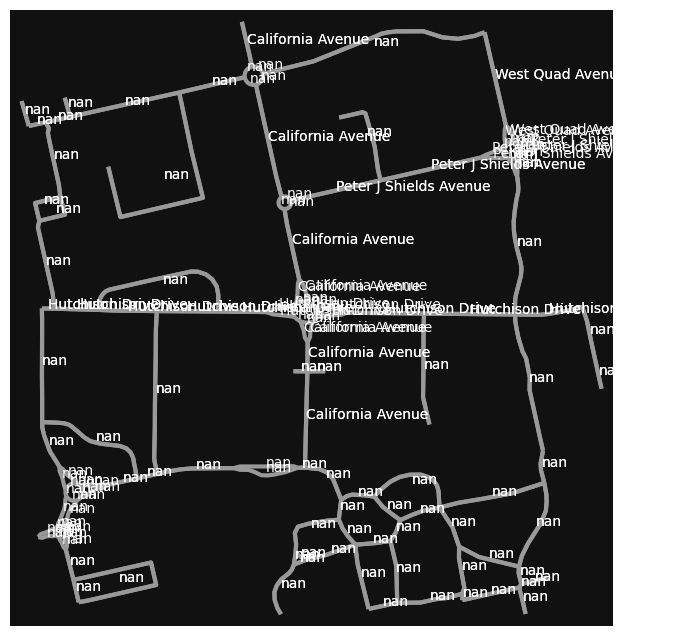

In [8]:
fig, ax = ox.plot_graph(testGraph, edge_linewidth=3, node_size=0, show=False, close=False)
for key, data  in edges.iterrows():
    text = data['name']
    print(text)
    c = data['geometry'].centroid
    print(c)
    ax.annotate(text, (c.x, c.y), c='w')
plt.show()

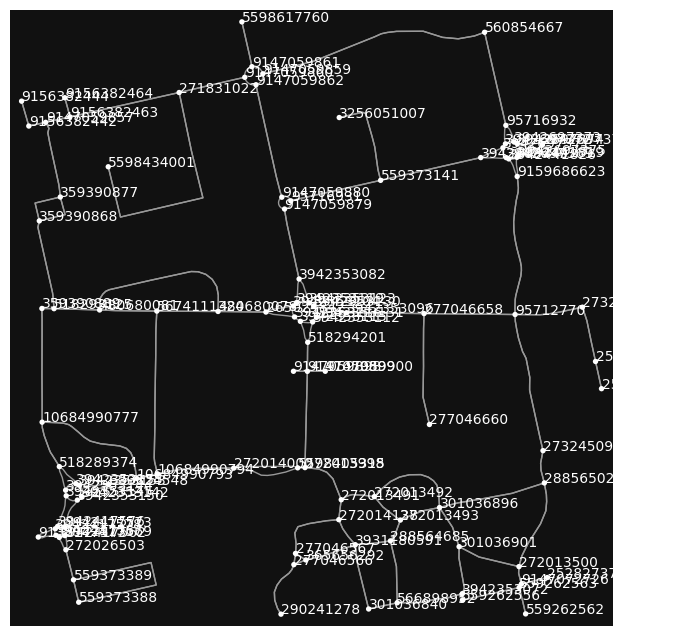

In [9]:
fig, ax = ox.plot.plot_graph(testGraph,show=False,close=False)
for key, data in nodes.iterrows():
    text = key
    labelLoc = data["geometry"].centroid
    ax.annotate(text, (labelLoc.x, labelLoc.y), c='w')
plt.show()

In [10]:
ox.stats.basic_stats(testGraph)

{'n': 105,
 'm': 221,
 'k_avg': 4.20952380952381,
 'edge_length_total': 9107.774741276287,
 'edge_length_avg': 41.21165041301487,
 'streets_per_node_avg': 2.8857142857142857,
 'streets_per_node_counts': {0: 0, 1: 7, 2: 2, 3: 92, 4: 4},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.06666666666666667,
  2: 0.01904761904761905,
  3: 0.8761904761904762,
  4: 0.0380952380952381},
 'intersection_count': 98,
 'street_length_total': 4995.196359569827,
 'street_segment_count': 142,
 'street_length_avg': 35.17743915190019,
 'circuity_avg': 1.092330055625545,
 'self_loop_proportion': 0.0}

# Modify bike network

In [11]:
# Set custom bike speed
bikeSpeed = 10  # in mph
edges["speed_kph"] = 1.609344 * bikeSpeed
edges["speed_kph"]

u            v          
95712770     273245096      16.09344
             273245111      16.09344
             277046658      16.09344
             9159686623     16.09344
95716931     559373141      16.09344
                              ...   
10684990793  10684990777    16.09344
             10684990794    16.09344
10684990794  272014000      16.09344
             5674111324     16.09344
             10684990793    16.09344
Name: speed_kph, Length: 221, dtype: float64

In [12]:
# Recalculate travel times based on new speed (seconds)
edges["travel_time"] = edges["length"] / (edges["speed_kph"] * 1000 / 3600)  # travel_time in seconds
edges["travel_time"]

u            v          
95712770     273245096      25.556516
             273245111      12.448305
             277046658      16.653057
             9159686623     25.607862
95716931     559373141      16.845745
                              ...    
10684990793  10684990777    22.653400
             10684990794     3.874593
10684990794  272014000      14.027425
             5674111324     29.838204
             10684990793     3.874593
Name: travel_time, Length: 221, dtype: float64

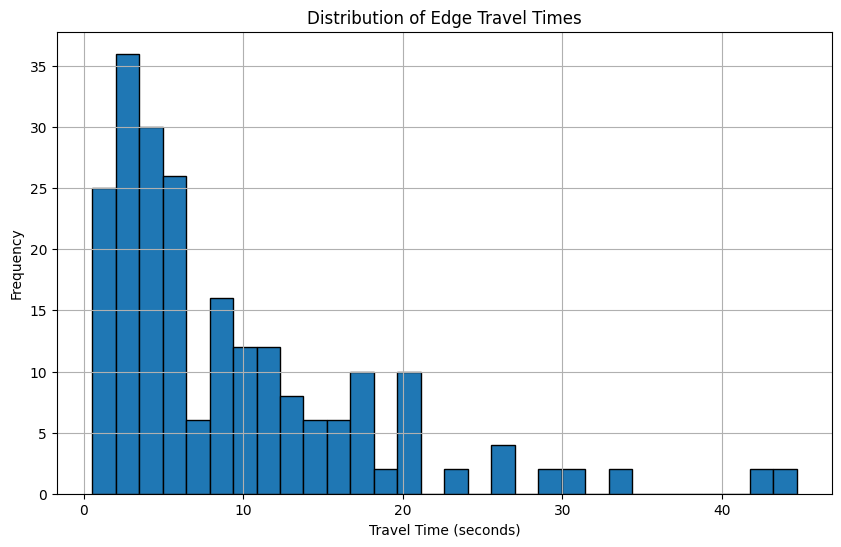

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
edges["travel_time"].hist(bins=30, ax=ax, edgecolor='black')
ax.set_xlabel('Travel Time (seconds)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Edge Travel Times')
plt.show()

## Generate time probability distributions

In [14]:
# Time range and interval creation
# For testing purposes, use 5 minutes and discretize into 0.1 second intervals
T = 150  # 2.5 minutes in seconds
timeUnit = 0.1  # 0.1 second intervals
intervals = int(T / timeUnit)
x = np.linspace(0, T, intervals + 1)

In [15]:
TTDistributions = pd.DataFrame(
    index=edges.index,
    columns=np.arange(0, intervals + 1)
)

In [16]:
for index, row in edges.iterrows():
    mu = row["travel_time"]  # mean travel time in seconds
    sigma = 0.2 * mu  # standard deviation as 20% of mean travel time

    # Create normal distribution for travel time
    norm_dist = norm(loc=mu, scale=sigma)

    # Discretize PDF values over the time range
    pdf_values = norm_dist.pdf(x) * timeUnit  # scale by time unit for discretization

    # Store the PDF values in the TTDistribution column
    TTDistributions.loc[index] = pdf_values

In [17]:
TTDistributions

0    1         2         3         4         5     \
u           v                                                               
95712770    273245096    0.0  0.0       0.0       0.0       0.0       0.0   
            273245111    0.0  0.0       0.0       0.0       0.0       0.0   
            277046658    0.0  0.0       0.0       0.0       0.0       0.0   
            9159686623   0.0  0.0       0.0       0.0       0.0       0.0   
95716931    559373141    0.0  0.0       0.0       0.0       0.0       0.0   
...                      ...  ...       ...       ...       ...       ...   
10684990793 10684990777  0.0  0.0       0.0       0.0       0.0       0.0   
            10684990794  0.0  0.0  0.000001  0.000001  0.000002  0.000004   
10684990794 272014000    0.0  0.0       0.0       0.0       0.0       0.0   
            5674111324   0.0  0.0       0.0       0.0       0.0       0.0   
            10684990793  0.0  0.0  0.000001  0.000001  0.000002  0.000004   

                             6         7        8         9     ... 1491 1492  \
u           v                                                   ...             
95712770    273245096         0.0       0.0      0.0       0.0  ...  0.0  0.0   
            273245111         0.0       0.0      0.0       0.0  ...  0.0  0.0   
            277046658         0.0       0.0      0.0       0.0  ...  0.0  0.0   
            9159686623        0.0       0.0      0.0       0.0  ...  0.0  0.0   
95716931    559373141         0.0       0.0      0.0       0.0  ...  0.0  0.0   
...                           ...       ...      ...       ...  ...  ...  ...   
10684990793 10684990777       0.0       0.0      0.0       0.0  ...  0.0  0.0   
            10684990794  0.000007  0.000012  0.00002  0.000033  ...  0.0  0.0   
10684990794 272014000         0.0       0.0      0.0       0.0  ...  0.0  0.0   
            5674111324        0.0       0.0      0.0       0.0  ...  0.0  0.0   
            10684990793  0.000007  0.000012  0.00002  0.000033  ...  0.0  0.0   

                        1493 1494 1495 1496 1497 1498 1499 1500  
u           v                                                    
95712770    273245096    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
            273245111    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
            277046658    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
            9159686623   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
95716931    559373141    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...                      ...  ...  ...  ...  ...  ...  ...  ...  
10684990793 10684990777  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
            10684990794  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
10684990794 272014000    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
            5674111324   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
            10684990793  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[221 rows x 1501 columns]

# Create Optimal Probability and Policy Tables

In [18]:
edges.index

MultiIndex([(   95712770,   273245096),
            (   95712770,   273245111),
            (   95712770,   277046658),
            (   95712770,  9159686623),
            (   95716931,   559373141),
            (   95716931,  9147059880),
            (   95716932,   560854667),
            (   95716932,  3942697372),
            (  265024842,   480680078),
            (  265024842,  3942353116),
            ...
            ( 9159686623,  3942441819),
            (10684990777,   359390889),
            (10684990777,   518289374),
            (10684990777, 10684990793),
            (10684990793,   639324548),
            (10684990793, 10684990777),
            (10684990793, 10684990794),
            (10684990794,   272014000),
            (10684990794,  5674111324),
            (10684990794, 10684990793)],
           names=['u', 'v'], length=221)

In [19]:
endNode = 301036896

In [20]:
probabilities = pd.DataFrame(
    columns= np.arange(0, intervals + 1),
    index=nodes.index,
)

probabilities.index.names = ['Start node']
probabilities.iloc[:,:] = 0
probabilities.loc[endNode,] = 1

In [21]:
probabilities

0    1    2    3    4    5    6    7    8    9     ... 1491 1492  \
Start node                                                     ...             
95712770       0    0    0    0    0    0    0    0    0    0  ...    0    0   
95716931       0    0    0    0    0    0    0    0    0    0  ...    0    0   
95716932       0    0    0    0    0    0    0    0    0    0  ...    0    0   
265024842      0    0    0    0    0    0    0    0    0    0  ...    0    0   
271831022      0    0    0    0    0    0    0    0    0    0  ...    0    0   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9156382464     0    0    0    0    0    0    0    0    0    0  ...    0    0   
9159686623     0    0    0    0    0    0    0    0    0    0  ...    0    0   
10684990777    0    0    0    0    0    0    0    0    0    0  ...    0    0   
10684990793    0    0    0    0    0    0    0    0    0    0  ...    0    0   
10684990794    0    0    0    0    0    0    0    0    0    0  ...    0    0   

            1493 1494 1495 1496 1497 1498 1499 1500  
Start node                                           
95712770       0    0    0    0    0    0    0    0  
95716931       0    0    0    0    0    0    0    0  
95716932       0    0    0    0    0    0    0    0  
265024842      0    0    0    0    0    0    0    0  
271831022      0    0    0    0    0    0    0    0  
...          ...  ...  ...  ...  ...  ...  ...  ...  
9156382464     0    0    0    0    0    0    0    0  
9159686623     0    0    0    0    0    0    0    0  
10684990777    0    0    0    0    0    0    0    0  
10684990793    0    0    0    0    0    0    0    0  
10684990794    0    0    0    0    0    0    0    0  

[105 rows x 1501 columns]

In [22]:
policy = pd.DataFrame(
    columns= np.arange(0, intervals + 1),
    index=nodes.index,
)
policy.index.names = ['Start node']

In [23]:
policy

0    1    2    3    4    5    6    7    8    9     ... 1491 1492  \
Start node                                                     ...             
95712770     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
95716931     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
95716932     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
265024842    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
271831022    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
9156382464   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
9159686623   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
10684990777  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
10684990793  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
10684990794  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   

            1493 1494 1495 1496 1497 1498 1499 1500  
Start node                                           
95712770     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
95716931     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
95716932     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
265024842    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
271831022    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...          ...  ...  ...  ...  ...  ...  ...  ...  
9156382464   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9159686623   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
10684990777  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
10684990793  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
10684990794  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[105 rows x 1501 columns]

# Computation

In [24]:
# test parameters
startNode = 95712770
timeBudget = 60

In [25]:
TTDistributions.loc[startNode].iloc[:,1:timeBudget+1]

1    2    3    4    5    6    7    8    9    10  ...        51  \
v                                                             ...             
273245096   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000003   
273245111   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000206   
277046658   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000029   
9159686623  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000003   

                  52        53        54        55        56        57  \
v                                                                        
273245096   0.000003  0.000003  0.000003  0.000004  0.000004  0.000004   
273245111   0.000231   0.00026  0.000291  0.000326  0.000365  0.000407   
277046658   0.000032  0.000036   0.00004  0.000044  0.000049  0.000054   
9159686623  0.000003  0.000003  0.000003  0.000004  0.000004  0.000004   

                  58        59        60  
v                                         
273245096   0.000004  0.000005  0.000005  
273245111   0.000453  0.000504   0.00056  
277046658   0.000059  0.000065  0.000072  
9159686623  0.000004  0.000005  0.000005  

[4 rows x 60 columns]

In [31]:
# Iterate through all time budgets
for timeBudget in np.arange(1, intervals + 1):
# for timeBudget in np.arange(1, 3):

    # Iterate through the possible start nodes
    for startNode in nodes.index:    

        # ignore endNode
        if startNode == endNode:
            continue

        # Calculate optimal probability of reaching the end node given the start node, end node, and time budget
        # Find relevant travel time distribution values
        distributionCalc = TTDistributions.loc[startNode].iloc[:,1:timeBudget+1]
        # Reverse travel time distribution values matrix
        distributionCalc = distributionCalc.iloc[:, ::-1]
        # Find relevant probabilities to adjacent nodes
        adjacentNodes = distributionCalc.index
        probabilitiesCalc = probabilities.loc[adjacentNodes].iloc[:,0:timeBudget]
        # Calculate the element-wise product of the two matrices
        result = distributionCalc.values * probabilitiesCalc.values
        # Sum the product to find probability of getting to end node based on which adjacent node is traveled to next
        row_sums = pd.Series(np.sum(result, axis=1), index=adjacentNodes)

        # Store the optimal probability
        probabilities.loc[startNode, timeBudget] = row_sums.max()
        
        # Store the optimal policy
        if np.nanmax(row_sums) == 0:
            policy.loc[startNode, timeBudget] = np.nan
        else:
            policy.loc[startNode, timeBudget] = str(row_sums.idxmax())

In [32]:
probabilities

0    1    2    3    4    5    6    7    8    9     ...      1491  \
Start node                                                     ...             
95712770       0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.999999   
95716931       0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.999994   
95716932       0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.999995   
265024842      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.999997   
271831022      0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.999976   
...          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
9156382464     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.788688   
9159686623     0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.999999   
10684990777    0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.999997   
10684990793    0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.999997   
10684990794    0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.999998   

                 1492      1493      1494      1495      1496      1497  \
Start node                                                                
95712770     0.999999  0.999999  0.999999  0.999999  0.999999  0.999999   
95716931     0.999994  0.999994  0.999994  0.999994  0.999994  0.999994   
95716932     0.999995  0.999995  0.999995  0.999995  0.999995  0.999995   
265024842    0.999997  0.999997  0.999997  0.999997  0.999997  0.999997   
271831022    0.999977  0.999978  0.999979   0.99998   0.99998  0.999981   
...               ...       ...       ...       ...       ...       ...   
9156382464   0.792048  0.795376  0.798672  0.801936  0.805168  0.808368   
9159686623   0.999999  0.999999  0.999999  0.999999  0.999999  0.999999   
10684990777  0.999997  0.999997  0.999997  0.999997  0.999997  0.999997   
10684990793  0.999997  0.999997  0.999997  0.999997  0.999997  0.999997   
10684990794  0.999998  0.999998  0.999998  0.999998  0.999998  0.999998   

                 1498      1499      1500  
Start node                                 
95712770     0.999999  0.999999  0.999999  
95716931     0.999994  0.999994  0.999994  
95716932     0.999995  0.999995  0.999995  
265024842    0.999997  0.999997  0.999997  
271831022    0.999982  0.999983  0.999983  
...               ...       ...       ...  
9156382464   0.811536   0.81467  0.817773  
9159686623   0.999999  0.999999  0.999999  
10684990777  0.999997  0.999997  0.999997  
10684990793  0.999997  0.999997  0.999997  
10684990794  0.999998  0.999998  0.999998  

[105 rows x 1501 columns]

In [33]:
policy

0    1    2          3          4          5          6     \
Start node                                                               
95712770     NaN  NaN  NaN  273245096  273245096  273245096  273245096   
95716931     NaN  NaN  NaN        NaN        NaN        NaN        NaN   
95716932     NaN  NaN  NaN        NaN        NaN        NaN        NaN   
265024842    NaN  NaN  NaN        NaN        NaN        NaN        NaN   
271831022    NaN  NaN  NaN        NaN        NaN        NaN        NaN   
...          ...  ...  ...        ...        ...        ...        ...   
9156382464   NaN  NaN  NaN        NaN        NaN        NaN        NaN   
9159686623   NaN  NaN  NaN        NaN   95712770   95712770   95712770   
10684990777  NaN  NaN  NaN        NaN        NaN        NaN        NaN   
10684990793  NaN  NaN  NaN        NaN        NaN        NaN        NaN   
10684990794  NaN  NaN  NaN        NaN        NaN        NaN  272014000   

                    7            8            9     ...         1491  \
Start node                                          ...                
95712770       273245096    273245096    273245096  ...    273245096   
95716931             NaN          NaN    559373141  ...   9147059880   
95716932             NaN          NaN   3942697372  ...   3942697372   
265024842            NaN   3942353116   3942353116  ...   3942353116   
271831022            NaN          NaN          NaN  ...   9147059860   
...                  ...          ...          ...  ...          ...   
9156382464           NaN          NaN          NaN  ...   9156382463   
9159686623      95712770     95712770     95712770  ...     95712770   
10684990777          NaN  10684990793  10684990793  ...  10684990793   
10684990793  10684990794  10684990794  10684990794  ...  10684990794   
10684990794    272014000    272014000    272014000  ...    272014000   

                    1492         1493         1494         1495         1496  \
Start node                                                                     
95712770       273245096    273245096    273245096    273245096    273245096   
95716931      9147059880   9147059880   9147059880   9147059880   9147059880   
95716932      3942697372   3942697372   3942697372   3942697372   3942697372   
265024842     3942353116   3942353116   3942353116   3942353116   3942353116   
271831022     9147059860   9147059860   9147059860   9147059860   9147059860   
...                  ...          ...          ...          ...          ...   
9156382464    9156382463   9156382463   9156382463   9156382463   9156382463   
9159686623      95712770     95712770     95712770     95712770     95712770   
10684990777  10684990793  10684990793  10684990793  10684990793  10684990793   
10684990793  10684990794  10684990794  10684990794  10684990794  10684990794   
10684990794    272014000    272014000    272014000    272014000    272014000   

                    1497         1498         1499         1500  
Start node                                                       
95712770       273245096    273245096    273245096    273245096  
95716931      9147059880   9147059880   9147059880   9147059880  
95716932      3942697372   3942697372   3942697372   3942697372  
265024842     3942353116   3942353116   3942353116   3942353116  
271831022     9147059860   9147059860   9147059860   9147059860  
...                  ...          ...          ...          ...  
9156382464    9156382463   9156382463   9156382463   9156382463  
9159686623      95712770     95712770     95712770     95712770  
10684990777  10684990793  10684990793  10684990793  10684990793  
10684990793  10684990794  10684990794  10684990794  10684990794  
10684990794    272014000    272014000    272014000    272014000  

[105 rows x 1501 columns]

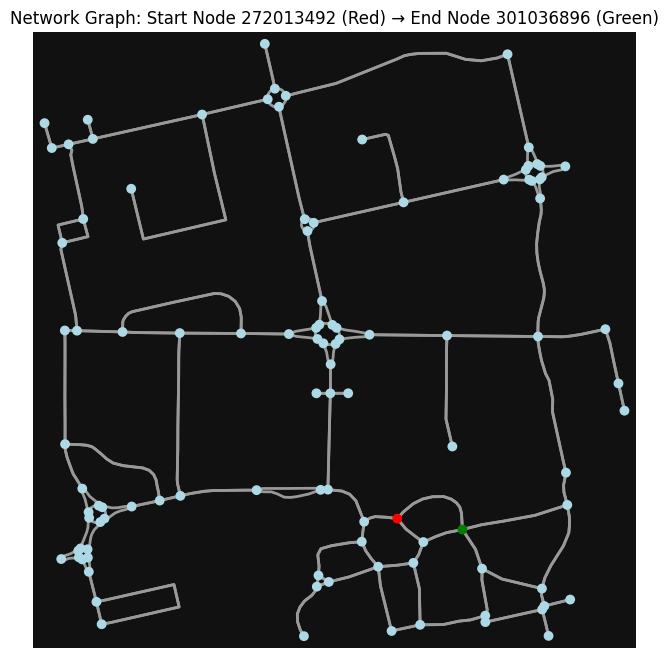

In [34]:
# Plot network with specific nodes highlighted
startNode_highlight = 272013492
endNode_highlight = endNode

# Create node color list
node_colors = []
for node in testGraph.nodes():
    if node == startNode_highlight:
        node_colors.append('red')  # Start node
    elif node == endNode_highlight:
        node_colors.append('green')  # End node
    else:
        node_colors.append('lightblue')  # Other nodes

fig, ax = ox.plot_graph(testGraph, node_color=node_colors, node_size=50, edge_linewidth=2, show=False, close=False)
ax.set_title(f'Network Graph: Start Node {startNode_highlight} (Red) → End Node {endNode_highlight} (Green)')
plt.show()

Investigate node 272013492

### Normal Distribution Testing

In [ ]:
lb, ub = norm.support()
display(lb, ub)

In [ ]:
mean, var, skew, kurt = norm.stats(moments='mvsk')
display(mean, var, skew, kurt)

In [ ]:
fig, ax = plt.subplots(1, 1)

mu=15
sigma=mu/5

norm_dist = norm(loc=mu, scale=sigma)

pdf_values = norm_dist.pdf(x) * timeUnit  # scale by timeUnit for proper normalization
ax.plot(x, pdf_values, 'b-', lw=5, alpha=0.6, label='edge pdf')

pdf_values.sum()

### Log-normal Distribution Testing

In [ ]:
s = 0.5
lb, ub = lognorm.support(s)
display(lb, ub)

In [ ]:
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')
display(mean, var, skew, kurt)

In [ ]:
mean, var, skew, kurt = lognorm.stats(s, loc=15-mean, moments='mvsk')
display(mean, var, skew, kurt)

In [ ]:
fig, ax = plt.subplots(1, 1)
mu = 15

x = np.linspace(lognorm.ppf(0.01, s, loc = mu-mean),
                lognorm.ppf(0.99, s, loc = mu-mean), 100)
ax.plot(x, lognorm.pdf(x, s, loc = mu-mean),
       'r-', lw=5, alpha=0.6, label='lognorm pdf')

In [ ]:
# Probability distribution of travel times
# normal, lognormal, logistic, gamma

# Clean driving network

# Varying Time Budgets